# Сборный проект

В вашем распоряжении данные о данны продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Цель исследования:

- проведите исследовательский анализ данных;
- Составьте портрет пользователя каждого региона (NA, EU, JP);
- Проверить гипотезы:
     - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
     - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
     
Ход исследования:

Получить данные из файла по путь: /datasets/games.csv. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Проверить данные на ошибки и оцените их влияние на исследование.

Описать и визуализировать информацию, проведите исследовательский анализ.

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияние рейтинга ESRB на продажи в отдельном регионе.

Проверить гипотезы.

In [1]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt # для постройки графиков
import seaborn # для диаграммы
import numpy as np # каждое значение округляется с помощью «потолка»: 
from scipy import stats as st # для проверки гипотезы в Python
import math
from math import factorial # для вероятностей
from math import sqrt # для вероятностей
from scipy.stats import binom # для вероятностей
import seaborn as sns #для ящика с усами

## Изучение данных из файла

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
display(games.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Постоим гистограммы

[[<AxesSubplot:title={'center':'Year_of_Release'}>
  <AxesSubplot:title={'center':'NA_sales'}>]
 [<AxesSubplot:title={'center':'EU_sales'}>
  <AxesSubplot:title={'center':'JP_sales'}>]
 [<AxesSubplot:title={'center':'Other_sales'}>
  <AxesSubplot:title={'center':'Critic_Score'}>]]


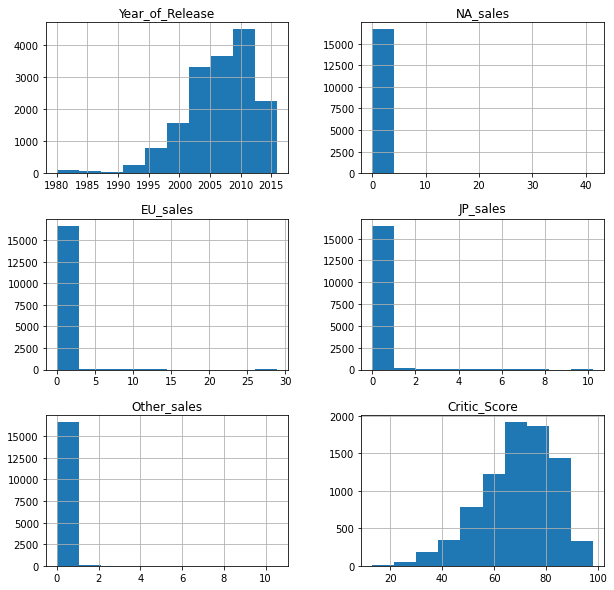

In [5]:
print(games.hist(figsize=(10, 10)))

Предоставленная таблица иммет набор данных по продажам игр на разных платформах, с оценками пользователей и рейтингом от критиков по разным регионам.

Необходимо привести названия столбцов к нижнему регистру и заменить тип данных где это необходимо для удобства в исследовании.
Посмотреть пропуски в столбцах.


## Подготовка данных

### Замените названия столбцов (приведите к нижнему регистру);

In [6]:
print(games.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [7]:
games.columns = games.columns.str.lower()

#games = games.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})

In [8]:
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Преобразуем данные в нужные типы.

name (название игры) тип данных object.

platform (платформа) тип данных object.

year_of_release (год выпуска) тип данных float64.

genre (жанр игры) тип данных object.

na_sales (продажи в Северной Америке (миллионы проданных копий)), тип данных float64.

na_sales продажи в Европе (миллионы проданных копий), тип данных float64.

eu_sales продажи в Японии (миллионы проданных копий), тип данных float64.

jp_sales продажи в других странах (миллионы проданных копий), тип данных float64.

other_sales Critic_Score — оценка критиков (максимум 100), тип данных float64.

critic_score оценка критиков (максимум 100), тип данных float64.

user_score оценка пользователей (максимум 10) тип данных object.

rating рейтинг от организации ESRB (англ. Entertainment Software Rating Board), тип данных object.

Посмотрим на столбец critic_score, и как выглядят оценки

In [10]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

В critic_score поменяем тип на Int64, так как все числа представлены целыми с точкой

In [11]:
games['critic_score'] = games['critic_score'].astype('Int64')

In [12]:
print (games['critic_score'])

0          76
1        <NA>
2          82
3          80
4        <NA>
         ... 
16710    <NA>
16711    <NA>
16712    <NA>
16713    <NA>
16714    <NA>
Name: critic_score, Length: 16715, dtype: Int64


Посмотрим значение столбца user_score

In [13]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В user_score необходимо изменить тип на float64

Аббервиатура "tbd" означает, что игра еще не оценена достаточным количеством пользователей. Расшифровывается с ангилийского "to be defined".

Аббревиатуру "tbd" изменим на NaN, т.к. в дальнейшем необходимо будет перевести в формат float64.

In [14]:
games['user_score']=games['user_score'].replace({'tbd':np.NaN})

Убираем " '' " и " , "

In [15]:
games['user_score'] = games['user_score'].str.replace(',', '.')

Меняем на формат float64

In [16]:
games['user_score'] = games['user_score'].astype('float64')

In [17]:
print(games['user_score'])

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64


Посмотрим значение столбца year_of_release

Так как дата представлена без месяцев, для удобстава меняем в year_of_release на формат Int64

In [18]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [19]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [20]:
print(games['year_of_release'])

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: Int64


### Обработайте пропуски при необходимости:

Вывелем количество пропусков

In [21]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Количество пропусков в genre и name одинаковые

In [22]:
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Так как name и genre имеют одинаковые пропуски, удалим их, так как их всего 2 строчки

In [23]:
games = games.dropna(subset = ['name'])

In [24]:
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [25]:
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Посмотрим пропуски в year_of_release

In [26]:
games['year_of_release'].isna().sum()

269

Узнаем какой % имеет пропущенных значений в столбце year_of_release

In [27]:
print('% пропущенных значений:', '{:.1%}'.format((games[games['year_of_release'].isna()].shape[0]/games['year_of_release'].shape[0])))

% пропущенных значений: 1.6%


1.6 % данных в которых не указан год, учитывая их малый процент, считаю можно их удалить.

In [28]:
games = games.dropna(subset = ['year_of_release'])

In [29]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

critic_score и user_score оставим без изменений, так как ощенки индивидуальны, устанавливать какую-либо оценку для неоцененной игры невозможно

rating

In [30]:
games['rating'].isna().sum()

6676

In [31]:
games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Не возможно заменить пропуски рейтинг определяет организация ESRB. Заполнив пропуски можно исказить данные.

Посмотрим на количество дубликатов

In [32]:
print('Количетво явных дубликатов', games.duplicated().sum())

Количетво явных дубликатов 0


Дубликаты отсутствуют.

Проверить данные на неполные дубликаты

In [33]:
duplicates = games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)

In [34]:
duplicated_rows = games[duplicates]

In [35]:
duplicated_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


In [36]:
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

### Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

Добавление столбца "total_sales_amount" - общая сумма продаж игры.

In [37]:
games['total_sales_amount'] = (games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'])

In [38]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_amount
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


Вывод:
Исправлены названия столбцов, приведены к нижнему регистру.
Заменены типа данных для столбцов: в critic_score поменяем тип на Int64, в user_score изменить тип на float64, в year_of_release поменяем тип на Int64.
Аббревиатура "tbd" заменена на NaN, т.к. она означает, недостаточное количество оценок для выставления общей.
Удалены 2 строки, столбцы name и genre имеют одинаковые пропуски, а так же удалены 269 строк, удалены все пропуски в столбце year_of_release по причине отсутствия года выпуска, что составляет 1,6% от всех данных.
Явных дублиактов не обнаружено, но были удалены неполные дубликаты.
Добавлен столбц "total_sales_amount" - общая сумма продаж игры.

## Проведите исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Составление таблицы с количеством выпускаемых игр по каждому году.

In [39]:
data_new = pd.pivot_table(games, index='year_of_release', values='name', aggfunc='count')

In [40]:
data_new.columns = ['Количество игр']

In [41]:
data_new

,Количество игр
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


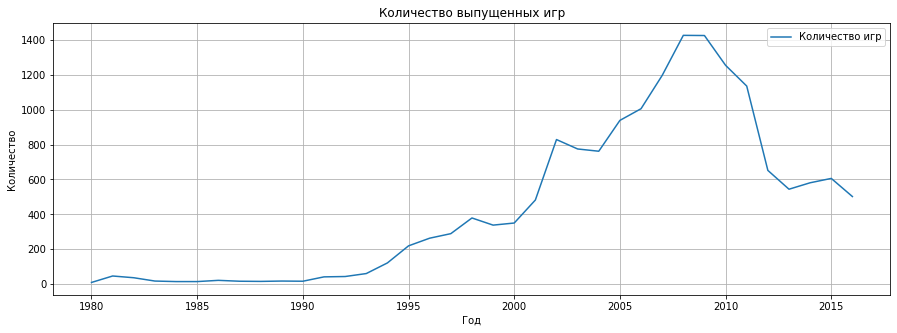

In [42]:
data_new.plot(grid=True, figsize=(15, 5))

plt.title('Количество выпущенных игр')
plt.xlabel('Год')
plt.ylabel('Количество')

plt.show()

Малое количество игр выпсукалось вплоть до 1995 года, далее идет подёъем. В 2010 году пошло на спад, но игр выпсукалось досаточное количество.
Можно выделить 3 этапа, подьем до 2007 г., пик 2008-2009 г., спад начинающийся с 2010 г.
Данных до 1995 мало и значительный рост наблюдается после 1995 г., считаю что данные до 1995 г. включительно не важны.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Выведем платформы с наибольшими сумарными продажами

In [43]:
data_new_i = pd.pivot_table(games, index='platform', values='total_sales_amount', aggfunc='sum')

In [44]:
data_new_i = data_new_i.sort_values('total_sales_amount',ascending=False)

In [45]:
data_new_i

,total_sales_amount
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [46]:
top_platform = list(data_new_i.index[:6])

In [47]:
top_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Наиболее популярными платформами являются PS2, X360, PS3, WII, DS, PS

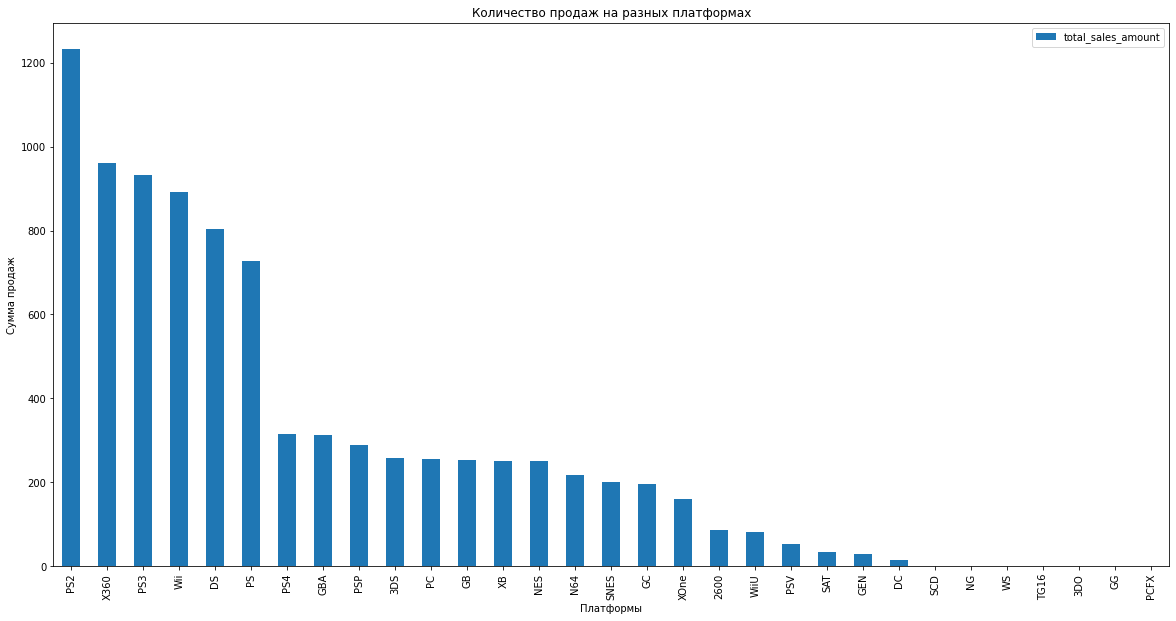

In [48]:
plt.rcParams["figure.figsize"] = (20,10)
ax = data_new_i.plot.bar()

plt.title('Количество продаж на разных платформах')
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж')

plt.show()

Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS.


Посмотрим за какой срок появляются новые и исчезают старые платформы

Разделим на 3 группы

In [49]:
platform_grouped = data_new_i.reset_index()

In [50]:
top_platforms_list = platform_grouped['platform'].unique()
top_platforms_list

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS', 'PC', 'GB', 'XB', 'NES', 'N64', 'SNES', 'GC', 'XOne',
       '2600', 'WiiU', 'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS',
       'TG16', '3DO', 'GG', 'PCFX'], dtype=object)

MICROSOFT

In [51]:
ps_list_m = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']

Text(0, 0.5, 'Продажи')

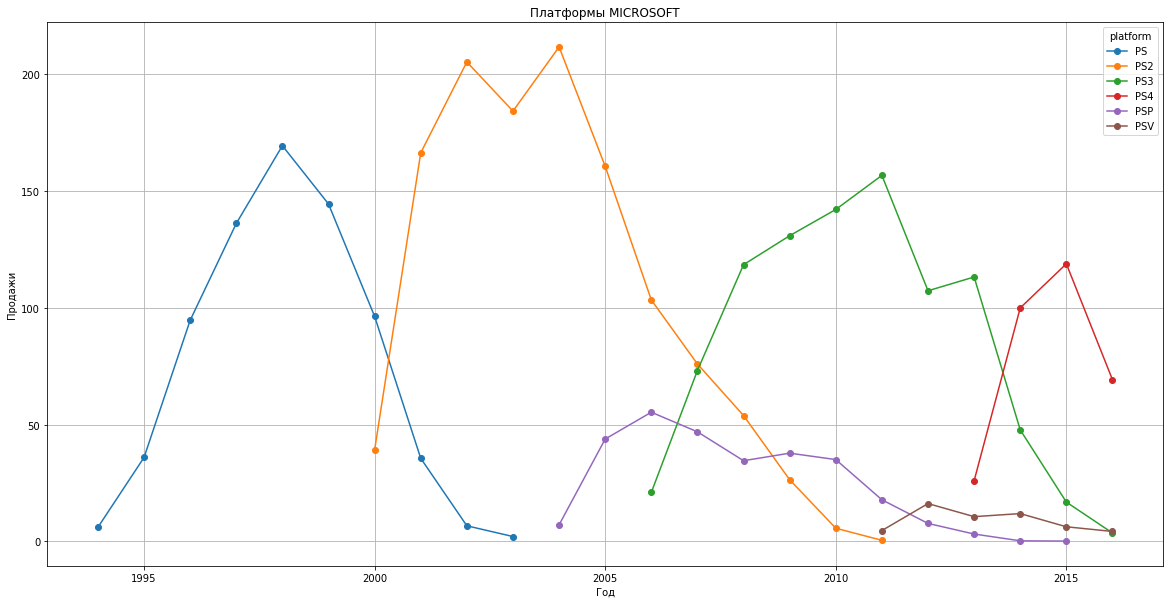

In [52]:
pd.pivot_table(games.query('platform == @ps_list_m'), index='year_of_release', columns='platform', values='total_sales_amount', aggfunc='sum').plot(grid=True, figsize=(20,10), style='o-')

plt.title('Платформы MICROSOFT')
plt.xlabel('Год')
plt.ylabel('Продажи')

У MICROSOFT средний период 'жизни' платформ длится около 10 лет, новое поколение выходит раз в 3-5 лет. До 2016 года дошли такие платформы как PSV PS3 PS4

SONY 

In [53]:
ps_list_s = ['X360', 'XB', 'XOne']

Text(0, 0.5, 'Продажи')

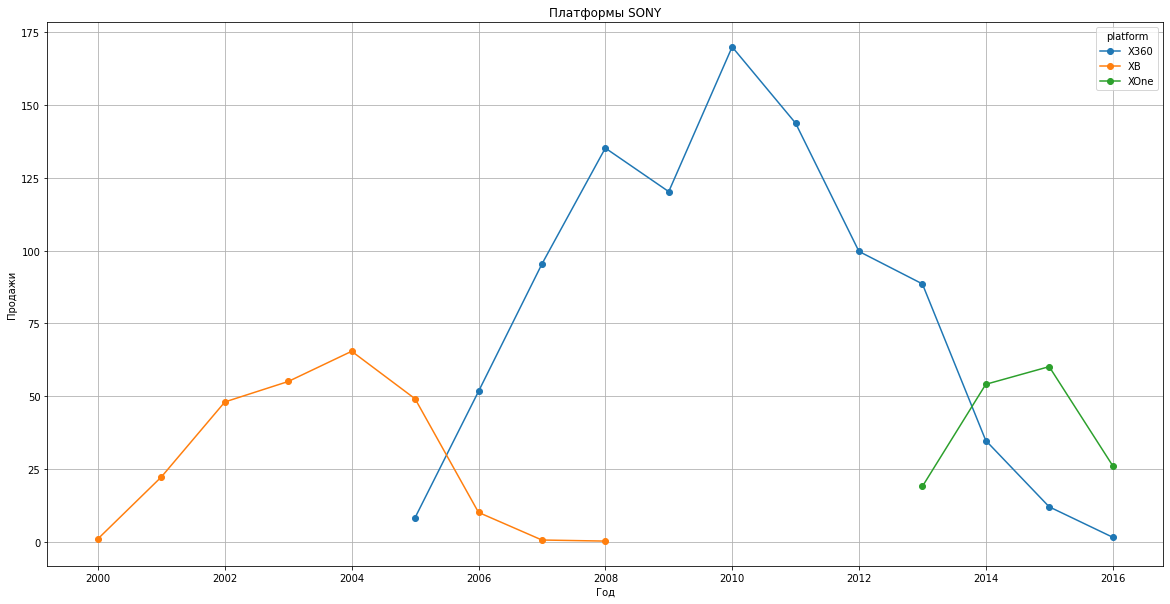

In [54]:
pd.pivot_table(games.query('platform == @ps_list_s'), index='year_of_release', columns='platform', values='total_sales_amount', aggfunc='sum').plot(grid=True, figsize=(20,10), style='o-')

plt.title('Платформы SONY')
plt.xlabel('Год')
plt.ylabel('Продажи')

SONY выпускает не так часто, за все время было выпущено 3 модели, 2 из которых еще на "ходу" X360 и XOne. период 'жизни' платформ длится около 10 лет, новое поколение выходит раз в 5 лет. В 2016 году на ходу остались X360 и XB.

Другие

In [55]:
ps_list_i = ['Wii', 'DS', 'GBA',
       '3DS', 'PC', 'GB', 'NES', 'N64', 'SNES', 'GC',
       '2600', 'WiiU', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS',
       'TG16', '3DO', 'GG', 'PCFX']

Text(0, 0.5, 'Продажи')

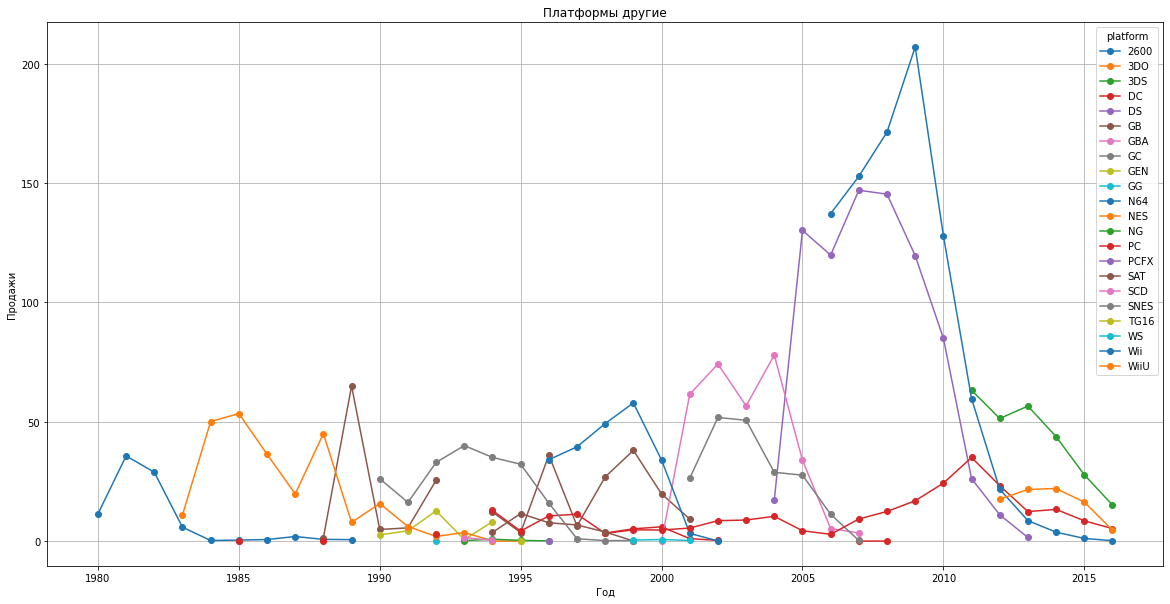

In [56]:
pd.pivot_table(games.query('platform == @ps_list_i'), index='year_of_release', columns='platform', values='total_sales_amount', aggfunc='sum').plot(grid=True, figsize=(20,10), style='o-')

plt.title('Платформы другие')
plt.xlabel('Год')
plt.ylabel('Продажи')

Исходя из графика, можно сказать, что средний период 'жизни' платформ длится 5-10 лет. В 2016 году еще остались 3DS, Wii, WiiU, PS.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Сейчас у нас выделяются 3 явных этапа развития индустрии: рост до 2008 года, пик 2008 года, а затем сокращение рынка последних годов.

Также большей части платформ уже нет в 2016 году, в построении прогноза на 2017 год они нам не помогут.

Будем рассматривать период начиная с 2012 года.

In [57]:
games_new = games[games['year_of_release'] > 2012]

In [58]:
games_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                2233 non-null   object 
 1   platform            2233 non-null   object 
 2   year_of_release     2233 non-null   Int64  
 3   genre               2233 non-null   object 
 4   na_sales            2233 non-null   float64
 5   eu_sales            2233 non-null   float64
 6   jp_sales            2233 non-null   float64
 7   other_sales         2233 non-null   float64
 8   critic_score        991 non-null    Int64  
 9   user_score          1192 non-null   float64
 10  rating              1256 non-null   object 
 11  total_sales_amount  2233 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 231.2+ KB


In [59]:
games_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_amount
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Изучим данные по продажам за выбранный актуальный период.

In [60]:
games_new_pr = pd.pivot_table(games_new, index=['platform', 'year_of_release'], values='total_sales_amount', aggfunc = 'sum')

In [61]:
print(games_new_pr.to_string())

                          total_sales_amount
platform year_of_release                    
3DS      2013                          56.57
         2014                          43.76
         2015                          27.78
         2016                          15.14
DS       2013                           1.54
PC       2013                          12.38
         2014                          13.28
         2015                           8.52
         2016                           5.25
PS3      2013                         113.25
         2014                          47.76
         2015                          16.82
         2016                           3.60
PS4      2013                          25.99
         2014                         100.00
         2015                         118.90
         2016                          69.25
PSP      2013                           3.14
         2014                           0.24
         2015                           0.12
PSV      2

In [62]:
games_new_pr = pd.pivot_table(games_new_pr, index='platform', values='total_sales_amount', aggfunc = 'sum')

In [63]:
games_new_pr.sort_values('total_sales_amount', ascending=False)

,total_sales_amount
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Наиболее продаваемыми за анализируемый период являются PS4, PS3, XOne.

In [64]:
iiiiii = games_new['platform'].unique()
iiiiii

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [65]:
list_iiii = ['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV','DS', 'PSP']

Text(0, 0.5, 'Продажи')

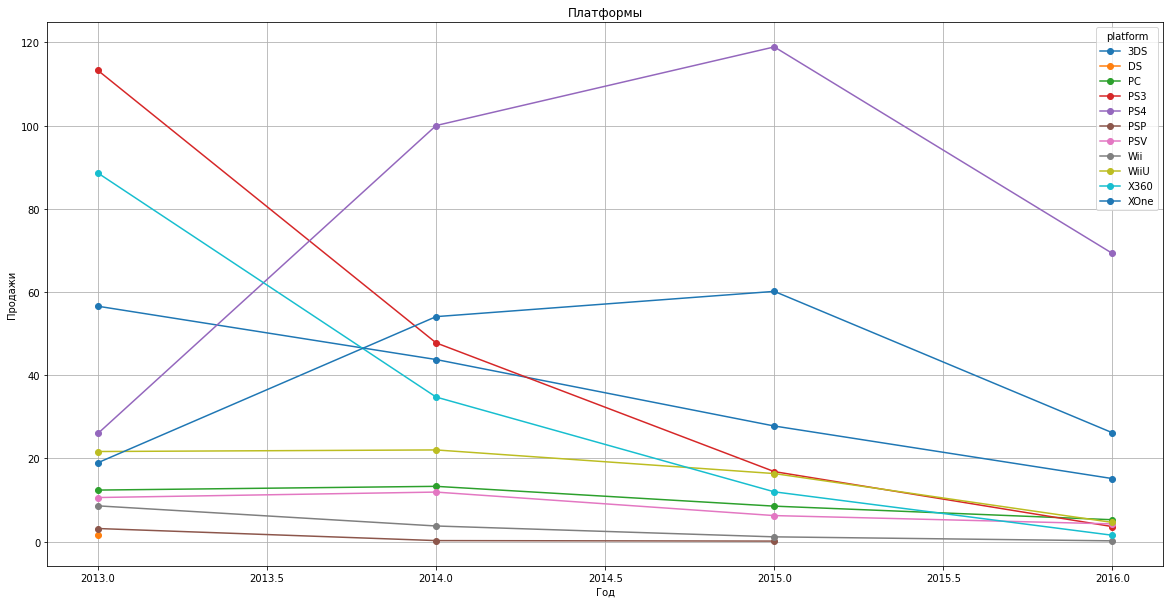

In [66]:
pd.pivot_table(games_new.query('platform == @list_iiii'), index='year_of_release', columns='platform', values='total_sales_amount', aggfunc='sum').plot(grid=True, figsize=(20,10), style='o-')

plt.title('Платформы')
plt.xlabel('Год')
plt.ylabel('Продажи')

На всех платформах наблюдается сильный спад продаж к 2016 году, наиболее продаваемыми к 2016 году являются новые модели, такие как PS4, XOne, 3DS 

In [67]:
games_new_pr_2015_2016 = games_new[games_new['year_of_release'] > 2015]

In [68]:
games_new_pr_2015_2016 = pd.pivot_table(games_new_pr_2015_2016, index='platform', values='total_sales_amount', aggfunc = 'sum')

In [69]:
games_new_pr_2015_2016.sort_values('total_sales_amount', ascending=False)

,total_sales_amount
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


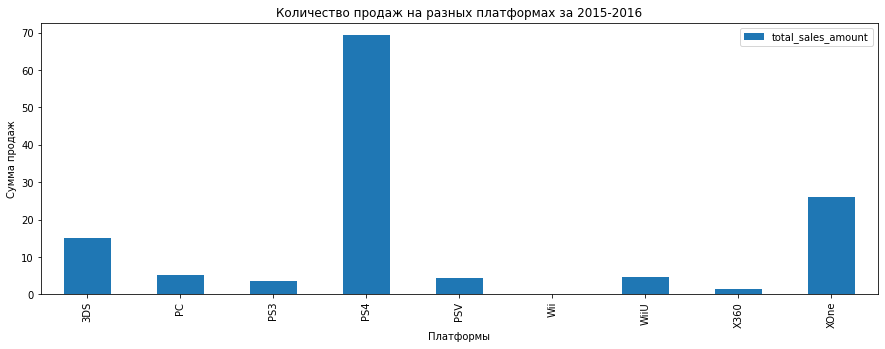

In [70]:
plt.rcParams["figure.figsize"] = (15,5)
ax = games_new_pr_2015_2016.plot.bar()

plt.title('Количество продаж на разных платформах за 2015-2016')
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж')

plt.show()

Наиболее прибыльные платформы за 2015-2016 года являются PS4, Xone, 3DS 

Лидером продаж за анализируемый период является PS4, на втором и третьем месте нахожятся PS3, XOne соответвенно. Однако продажи PS3 к концу анализируемого периода упали практически на минимум в связи с устареванием платформы. Данная консоль уже не актуальна, соотвественно, не прибыльна. Если рассматривать период за 2015-2016 год, то в лидерах так же остаются PS4, XOne, поэтому данные платфонмы считаю прибыльной. Продажи игр не PC довольно тяжело оценить, ведь PC можно модернизировать во время использования и сделать актуальным, несмотря на это имеет низкие продажи. Но на мой взгляд эта платформа всегда будет актуальна.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

<AxesSubplot:xlabel='total_sales_amount', ylabel='platform'>

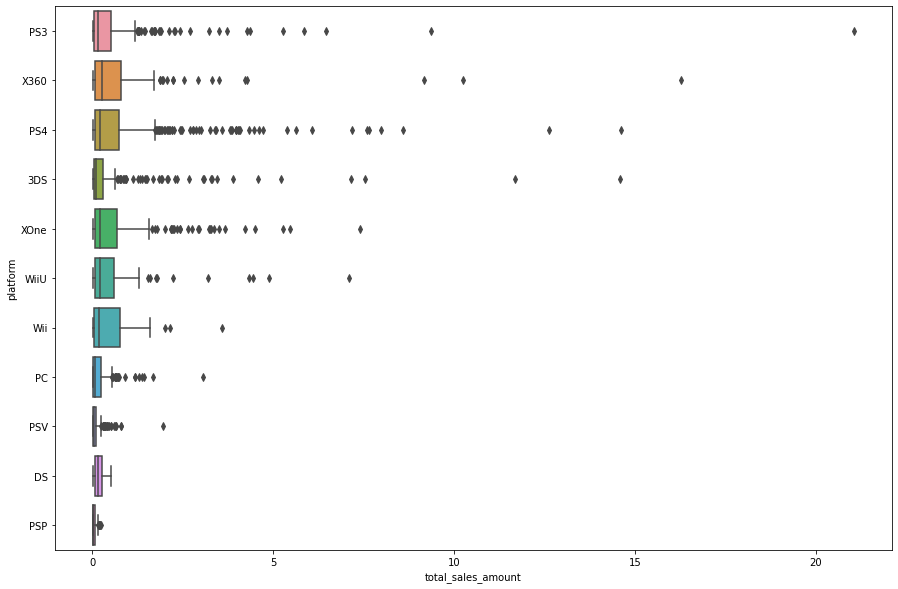

In [71]:
plt.figure(figsize=(15,10))
sns.boxplot(x="total_sales_amount", y="platform", data=games_new.reset_index())

Па графику можно понять, прибыль всех платформ. Наиболее прибыльными являются Wii, PS4 и X360. Самая маленькая прибыль у PSV и PSP за актуальный период. Так же медиана протекает у всех по разному. Положени PS4 и X360 можно объяснить тем, что данные приставки позднее остальных вышли на рынки. Выбросы можно объяснить тем, что часть прибыли компаниям приносят некоторые отдельные игры, которые пользуются большой популярностью.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Определим корреляцию платформ.

In [72]:
games_new['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

PS3


,total_sales_amount,critic_score,user_score
total_sales_amount,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


Платформа: PS3, Уровень кореляции между отзывами критиков и продажами: 0.3342853393371921
Платформа: PS3, Уровень кореляции между отзывами пользователей и продажами: 0.002394402735756906
X360


,total_sales_amount,critic_score,user_score
total_sales_amount,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


Платформа: X360, Уровень кореляции между отзывами критиков и продажами: 0.35034454602286624
Платформа: X360, Уровень кореляции между отзывами пользователей и продажами: -0.011742185147181627
PS4


,total_sales_amount,critic_score,user_score
total_sales_amount,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Платформа: PS4, Уровень кореляции между отзывами критиков и продажами: 0.40656790206178123
Платформа: PS4, Уровень кореляции между отзывами пользователей и продажами: -0.03195711020455685
3DS


,total_sales_amount,critic_score,user_score
total_sales_amount,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


Платформа: 3DS, Уровень кореляции между отзывами критиков и продажами: 0.3570566142288098
Платформа: 3DS, Уровень кореляции между отзывами пользователей и продажами: 0.24150411773562974
XOne


,total_sales_amount,critic_score,user_score
total_sales_amount,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


Платформа: XOne, Уровень кореляции между отзывами критиков и продажами: 0.4169983280084021
Платформа: XOne, Уровень кореляции между отзывами пользователей и продажами: -0.06892505328279543
WiiU


,total_sales_amount,critic_score,user_score
total_sales_amount,1.000000,0.376415,0.419330
critic_score,0.376415,1.000000,0.721313
user_score,0.419330,0.721313,1.000000


Платформа: WiiU, Уровень кореляции между отзывами критиков и продажами: 0.37641490654239107
Платформа: WiiU, Уровень кореляции между отзывами пользователей и продажами: 0.419330481926619
PC


,total_sales_amount,critic_score,user_score
total_sales_amount,1.000000,0.196030,-0.093842
critic_score,0.196030,1.000000,0.429562
user_score,-0.093842,0.429562,1.000000


Платформа: PC, Уровень кореляции между отзывами критиков и продажами: 0.19603028294369507
Платформа: PC, Уровень кореляции между отзывами пользователей и продажами: -0.09384186952476795
PSV


,total_sales_amount,critic_score,user_score
total_sales_amount,1.000000,0.254742,0.000942
critic_score,0.254742,1.000000,0.611521
user_score,0.000942,0.611521,1.000000


Платформа: PSV, Уровень кореляции между отзывами критиков и продажами: 0.25474235030686393
Платформа: PSV, Уровень кореляции между отзывами пользователей и продажами: 0.0009424723319102075


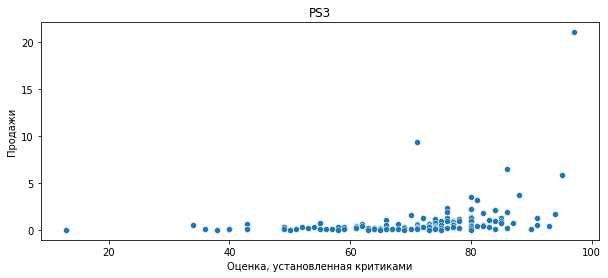

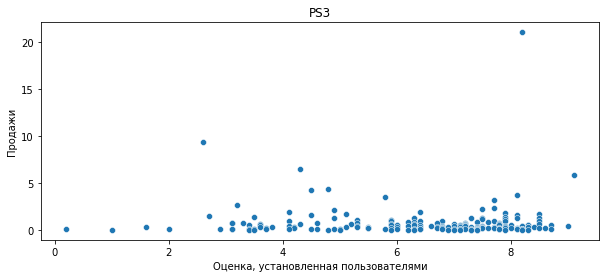

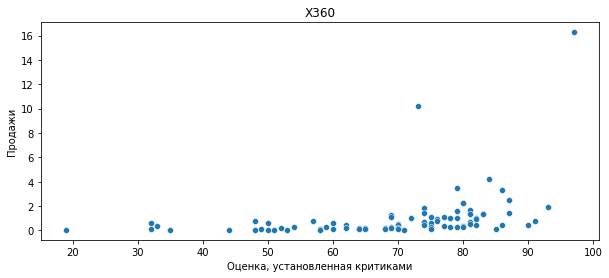

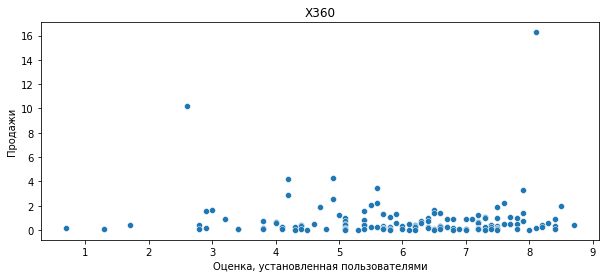

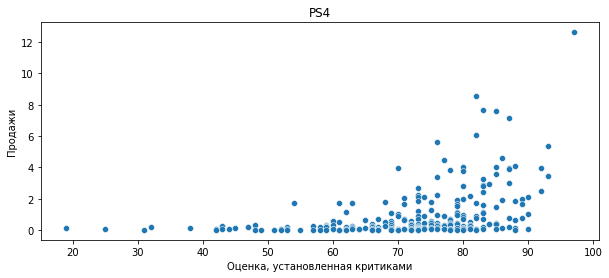

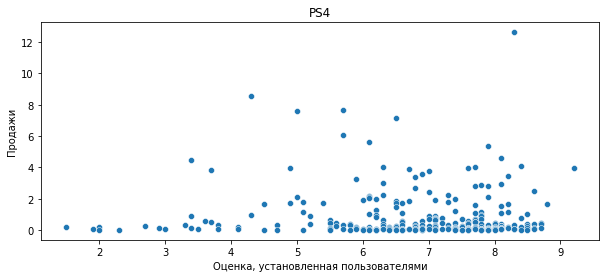

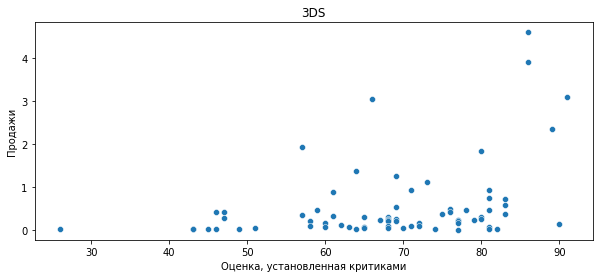

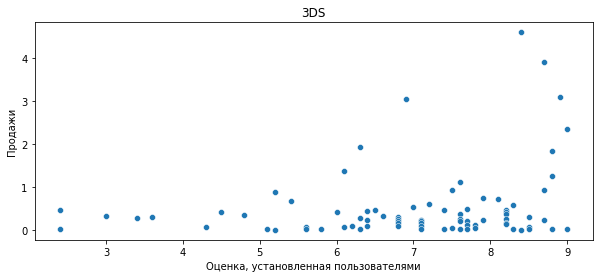

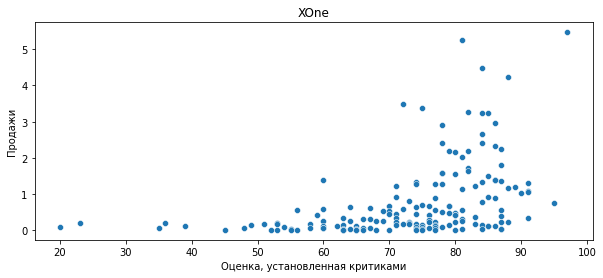

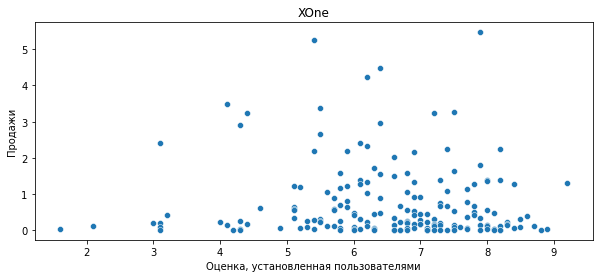

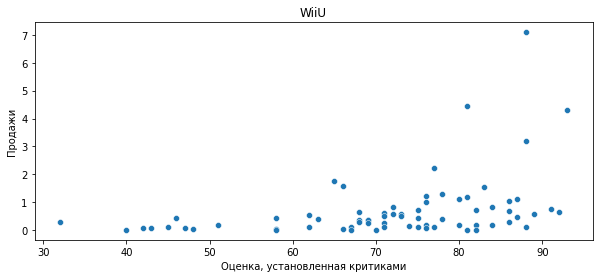

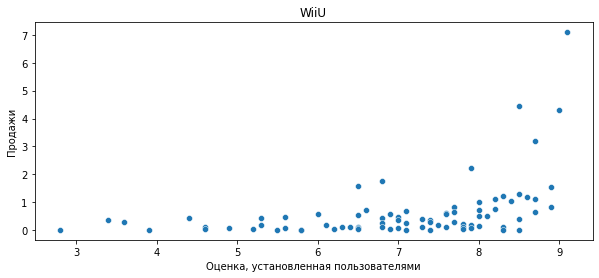

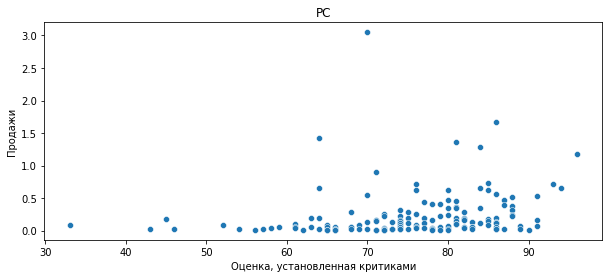

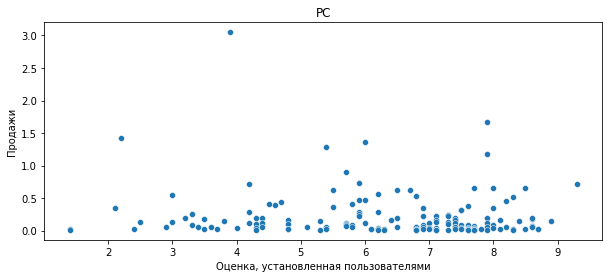

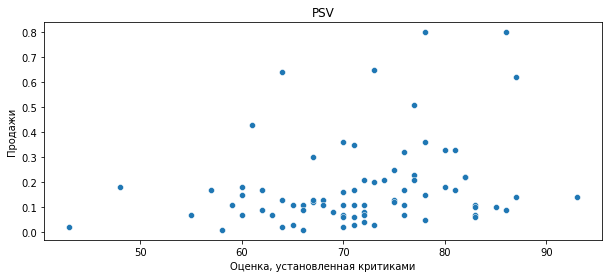

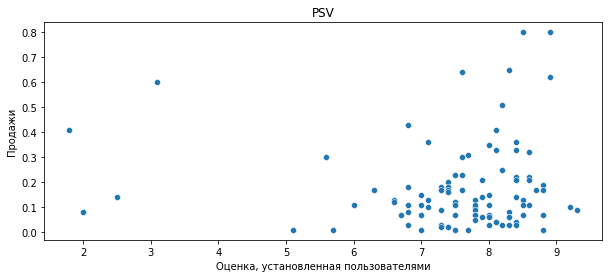

In [73]:
for p in ['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV']:
    print (p)
    data_select = games_new.query('platform == @p')
    #display(data_select)
    data_select = data_select.loc[:,['total_sales_amount', 'critic_score', 'user_score']]
    display(data_select.corr())
    plt.figure(figsize=(10,4))
    sns.scatterplot(x='critic_score', y='total_sales_amount', data=data_select)
    print(f'Платформа: {p}, Уровень кореляции между отзывами критиков и продажами:',games_new[games_new['platform']==p].corr().loc['critic_score', 'total_sales_amount'])
    print(f'Платформа: {p}, Уровень кореляции между отзывами пользователей и продажами:',games_new[games_new['platform']==p].corr().loc['user_score', 'total_sales_amount'])
    plt.title(p)
    plt.xlabel('Оценка, установленная критиками')
    plt.ylabel('Продажи')
    #plt.title('между отзывами критиков и продажами', p)   
    plt.figure(figsize=(10,4))
    sns.scatterplot(x='user_score', y='total_sales_amount', data=data_select)
    plt.title(p)
    plt.xlabel('Оценка, установленная пользователями')
    plt.ylabel('Продажи')
    #plt.title('между отзывами пользователей и продажами', p)
    

В основном корреляция наблюдается между отзывами критиков и продажами, нежели между отзывами пользователей и продажами. 
Наиболее зависимыми от отзывов критиков являются такие платформы как: PS4, Xone, X360, 3DS. А платформа WiUU имеет умеренную корреляцию между отзывами критиков и продажами, так и между отзывами пользователей и продажами.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Построим таблицу

In [74]:
data_genree = pd.pivot_table(games_new, index='genre', values='total_sales_amount', aggfunc='sum').sort_values(by='total_sales_amount', ascending=False)

In [75]:
data_genree

,total_sales_amount
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Отрисуем барплот чтобы наглядно посмотреть какие жанры лидирует, а какие остаются внизу

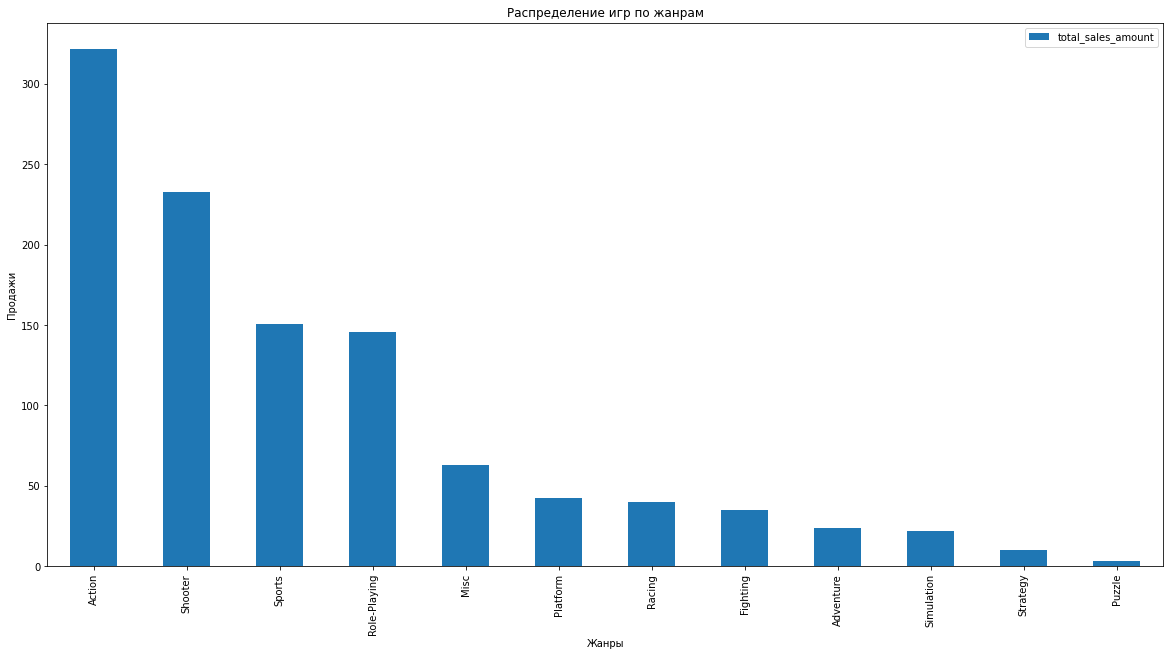

In [76]:
plt.rcParams["figure.figsize"] = (20,10)
ay = data_genree.plot.bar()

plt.title('Распределение игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')

plt.show()

Лидерами являются жанры Action, Shooter, Sports. Менее продаваемым жанром является Puzzle.

In [77]:
data_genree_median = pd.pivot_table(games_new, index='genre', values='total_sales_amount', aggfunc='median').sort_values(by='total_sales_amount', ascending=False)

Посмотрим медианные значения

In [78]:
data_genree_median

,total_sales_amount
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


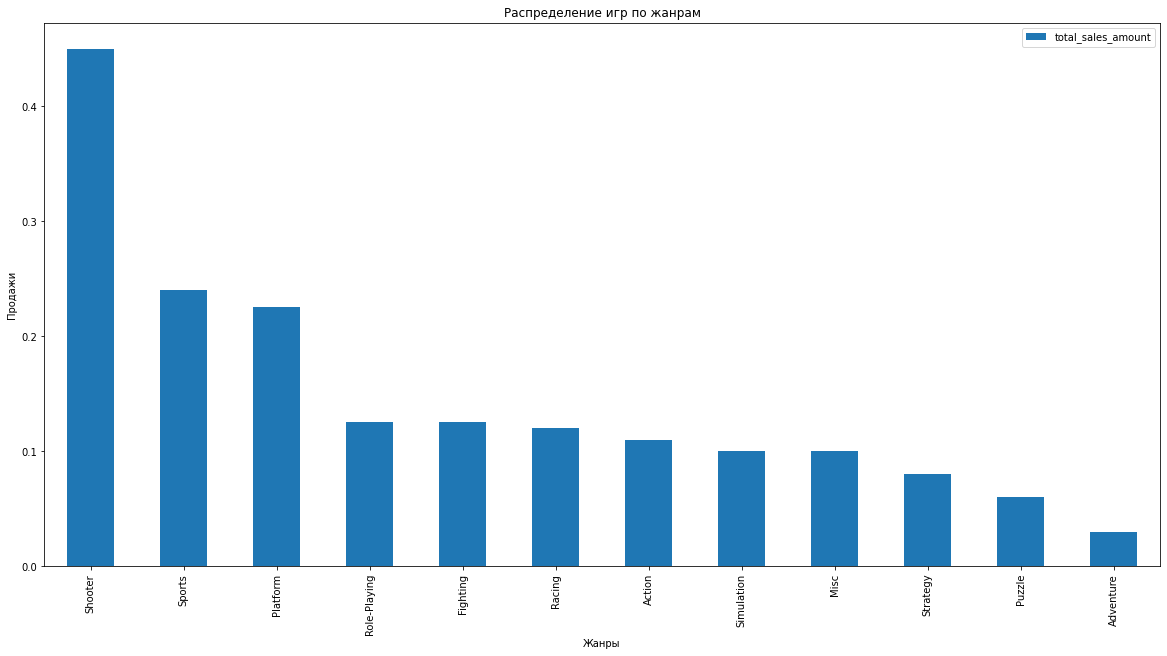

In [79]:
plt.rcParams["figure.figsize"] = (20,10)
ay = data_genree_median.plot.bar()

plt.title('Распределение игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')

plt.show()

Таблица лидеров уже поменялась, лидирующими стали Shooter, Sports и Platform. Жани Action сместился уже на 7 место, когда как Sports и Platform остались на лидирующих позициях. Скорее всего на сумарные продажи в жанре Action оказали влияние игры бестселлеров.

Вывод:

Малое количество игр выпсукалось вплоть до 1995 года, далее идет подёъем. В 2010 году пошло на спад, но игр выпсукалось досаточное количество. Можно выделить 3 этапа, подьем до 2007 г., пик 2008-2009 г., спад начинающийся с 2010 г. Данных до 1995 мало и значительный рост наблюдается после 1995 г., считаю что данные до 1995 г. включительно не важны. Средний период 'жизни' платформ длится 5-10 лет.

Актуальным периодом будем считать период, начиная с 2012 года.

Лидером продаж за анализируемый период является PS4, на втором и третьем месте нахожятся PS3, XOne соответвенно. Однако продажи PS3 к концу анализируемого периода упали практически на минимум в связи с устареванием платформы. Данная консоль уже не актуальна, соотвественно, не прибыльна. Если рассматривать период за 2015-2016 год, то в лидерах так же остаются PS4, XOne, поэтому данные платфонмы считаю прибыльной. Продажи игр не PC довольно тяжело оценить, ведь PC можно модернизировать во время использования и сделать актуальным, несмотря на это имеет низкие продажи. Но на мой взгляд эта платформа всегда будет актуальна. Так же медиана протекает у всех по разному. Выбросы можно объяснить тем, что часть прибыли компаниям приносят некоторые отдельные игры, которые пользуются большой популярностью.

В основном корреляция наблюдается между отзывами критиков и продажами, нежели между отзывами пользователей и продажами. Наиболее зависимыми от отзывов критиков являются такие платформы как: PS4, Xone, X360, 3DS. А платформа WiUU имеет умеренную корреляцию между отзывами критиков и продажами, так и между отзывами пользователей и продажами.

Лидерами по продажам в жанрах являются Action, Shooter, Sports. Менее продаваемым жанром является Puzzle. Однако, если рассматривать медианные продажи, то лидирующими становятся платформы Shooter, Sports и Platform. Жани Action сместился уже на 7 место, когда как Sports и Platform остались на лидирующих позициях. Скорее всего на сумарные продажи в жанре Action оказали влияние игры бестселлеров.

## Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

NA

In [80]:
na_popular_platforms = games_new.groupby('platform').na_sales.sum().sort_values(ascending=False)[:5]

In [81]:
na_popular_platforms

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

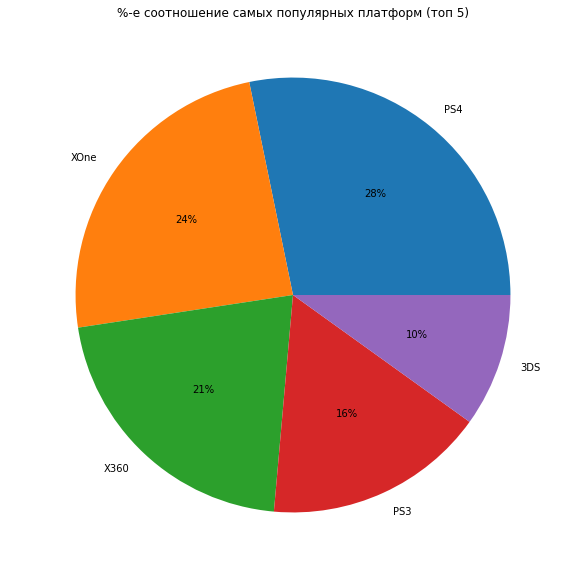

In [82]:
na_popular_platforms.plot(kind='pie', title ='%-е соотношение самых популярных платформ (топ 5)', grid=True, autopct = '%1.0f%%', figsize=(10,10))
plt.ylabel(' ')


plt.show()

Наиболее популярной платформой в Северной Америке является PS4, самой не популяпной является 3DS

EU

In [83]:
eu_popular_platforms = games_new.groupby('platform').eu_sales.sum().sort_values(ascending=False)[:5]

In [84]:
eu_popular_platforms

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

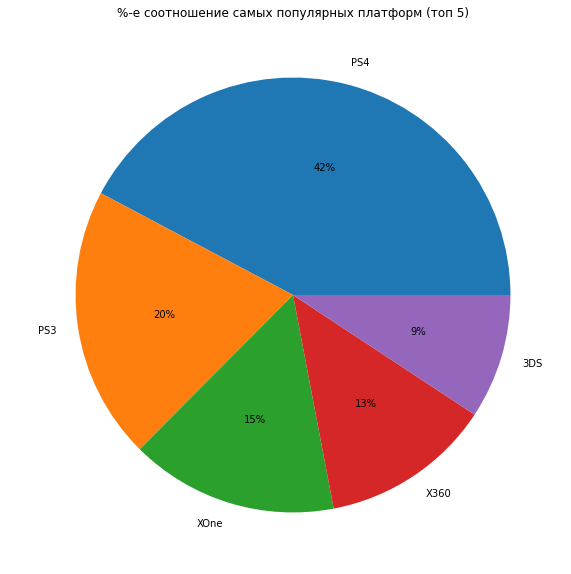

In [85]:
eu_popular_platforms.plot(kind='pie', title ='%-е соотношение самых популярных платформ (топ 5)', grid=True, autopct = '%1.0f%%', figsize=(10,10))
plt.ylabel(' ')


plt.show()

Наиболее популярной платформой в Европе является PS4, самой не популяпной является 3DS

JP

In [86]:
jp_popular_platforms = games_new.groupby('platform').jp_sales.sum().sort_values(ascending=False)[:5]

In [87]:
jp_popular_platforms

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

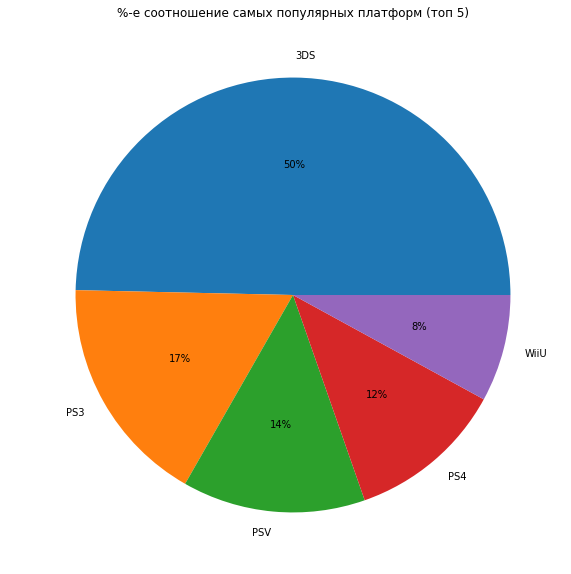

In [88]:
jp_popular_platforms.plot(kind='pie', title ='%-е соотношение самых популярных платформ (топ 5)', grid=True, autopct = '%1.0f%%', figsize=(10,10))
plt.ylabel(' ')


plt.show()

Наиболее популярной платформой в Японии является 3DS, самой не популяпной является WiiU

In [89]:
data_dop_1 = pd.DataFrame(data=[na_popular_platforms,eu_popular_platforms,jp_popular_platforms]).T
data_dop_1

,na_sales,eu_sales,jp_sales
platform,,,
PS4,108.74,141.09,15.96
XOne,93.12,51.59,NaN
X360,81.66,42.52,NaN
PS3,63.50,67.81,23.35
3DS,38.20,30.96,67.81
PSV,NaN,NaN,18.59
WiiU,NaN,NaN,10.88


<AxesSubplot:xlabel='platform'>

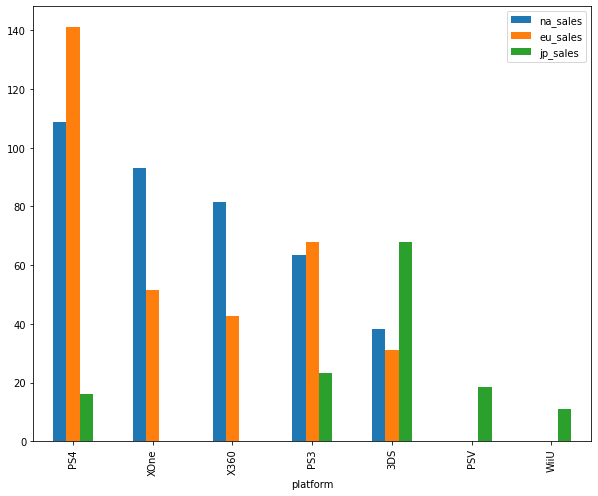

In [90]:
data_dop_1.plot(kind='bar',figsize=(10,8))

Наиболее популярной платформой в Северной Америке является PS4, самой не популяпной является 3DS

Наиболее популярной платформой в Европе является PS4, самой не популяпной является 3DS

Наиболее популярной платформой в Японии является 3DS, самой не популяпной является WiiU

### Самые популярные жанры (топ-5). Поясните разницу.

NA

In [91]:
na_popular_genres = games_new.groupby('genre').na_sales.sum().sort_values(ascending=False)[:5]

In [92]:
na_popular_genres

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

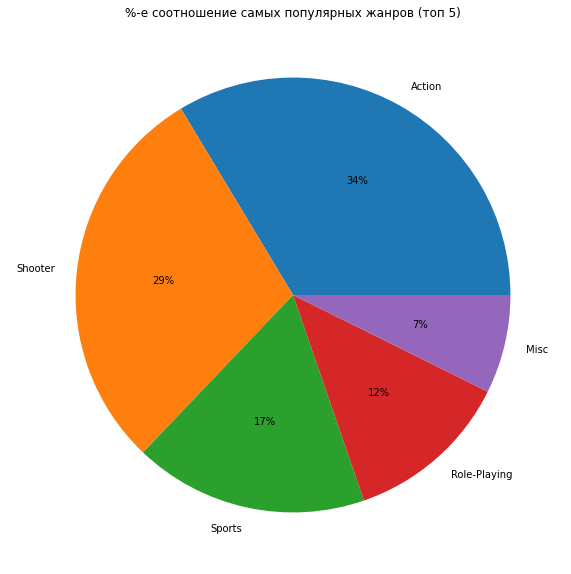

In [93]:
na_popular_genres.plot(kind='pie', title ='%-е соотношение самых популярных жанров (топ 5)', grid=True, autopct = '%1.0f%%', figsize=(10,10))
plt.ylabel(' ')


plt.show()

Наиболее популярным жанром в Северной Америке является Action, самой не популяпной является Misc

EU

In [94]:
eu_popular_genres = games_new.groupby('genre').eu_sales.sum().sort_values(ascending=False)[:5]

In [95]:
eu_popular_genres

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

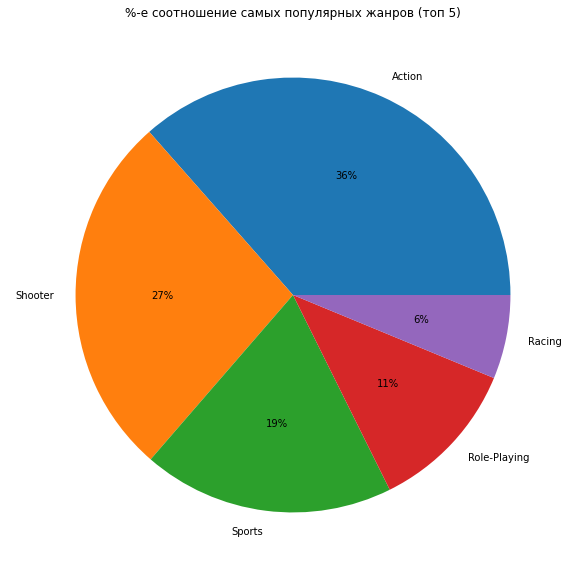

In [96]:
eu_popular_genres.plot(kind='pie', title ='%-е соотношение самых популярных жанров (топ 5)', grid=True, autopct = '%1.0f%%', figsize=(10,10))
plt.ylabel(' ')


plt.show()

Наиболее популярным жанром в Европе является Action, самой не популяпной является Racing

JP

In [97]:
jp_popular_genres = games_new.groupby('genre').jp_sales.sum().sort_values(ascending=False)[:5]

In [98]:
jp_popular_genres

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

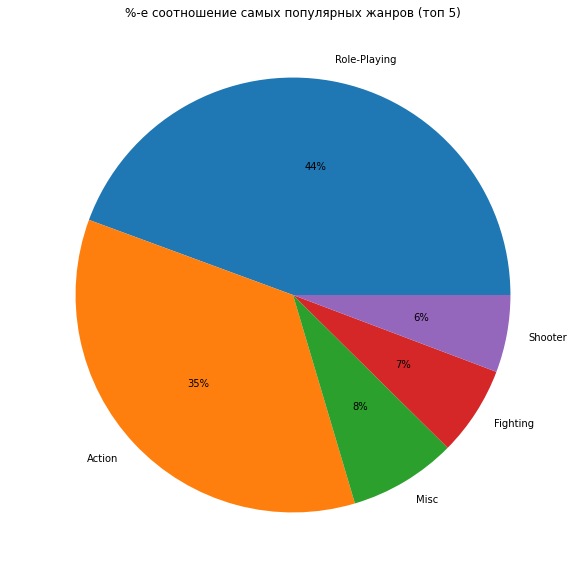

In [99]:
jp_popular_genres.plot(kind='pie', title ='%-е соотношение самых популярных жанров (топ 5)', grid=True, autopct = '%1.0f%%', figsize=(10,10))
plt.ylabel(' ')


plt.show()

Наиболее популярным жанром в Японии является Role-Playing, самыми не популяпными являются Shooter

In [100]:
data_dop_2 = pd.DataFrame(data=[na_popular_genres,eu_popular_genres, jp_popular_genres]).T

In [101]:
data_dop_2

,na_sales,eu_sales,jp_sales
genre,,,
Action,126.05,118.13,40.49
Shooter,109.74,87.86,6.61
Sports,65.27,60.52,NaN
Role-Playing,46.40,36.97,51.04
Misc,27.49,NaN,9.20
Racing,NaN,20.19,NaN
Fighting,NaN,NaN,7.65


<AxesSubplot:xlabel='genre'>

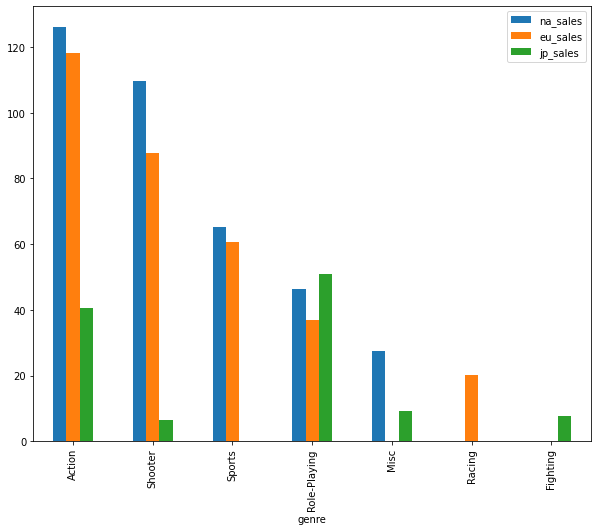

In [102]:
data_dop_2.plot(kind='bar', figsize=(10,8))

Наиболее популярным жанром в Северной Америке является Action, самой не популяпной является Misc

Наиболее популярным жанром в Европе является Action, самой не популяпной является Racing

Наиболее популярным жанром в Японии является Role-Playing, самыми не популяпными являются Shooter

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

NA

In [103]:
na_popular_ratings = games_new.groupby('rating').sum().na_sales

In [104]:
na_popular_ratings

rating
E        79.05
E10+     54.24
M       165.21
T        49.79
Name: na_sales, dtype: float64

EU

In [105]:
eu_popular_ratings = games_new.groupby('rating').sum().eu_sales

In [106]:
eu_popular_ratings

rating
E        83.36
E10+     42.69
M       145.32
T        41.95
Name: eu_sales, dtype: float64

JP

In [107]:
jp_popular_ratings = games_new.groupby('rating').sum().jp_sales

In [108]:
jp_popular_ratings

rating
E       15.14
E10+     5.89
M       14.11
T       20.59
Name: jp_sales, dtype: float64

In [109]:
data_dop_3 = pd.DataFrame([na_popular_ratings, eu_popular_ratings, jp_popular_ratings])

In [110]:
data_dop_3

rating,E,E10+,M,T
na_sales,79.05,54.24,165.21,49.79
eu_sales,83.36,42.69,145.32,41.95
jp_sales,15.14,5.89,14.11,20.59


<AxesSubplot:>

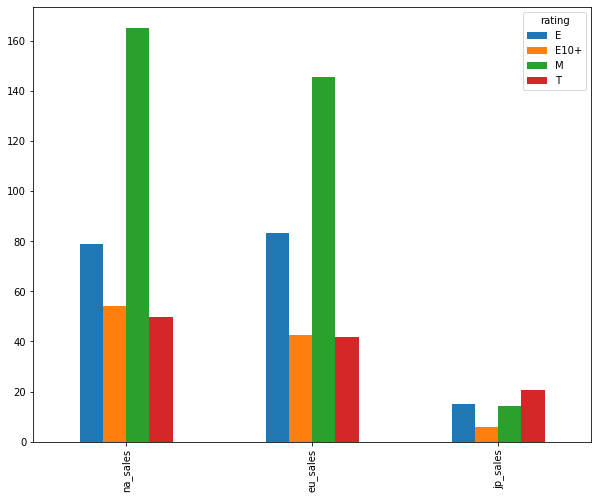

In [111]:
data_dop_3.plot(kind='bar', figsize=(10,8))

В Северной Америке и Европе наиболее популярны игры с рейтигром М, В Европе лидирует жанр М, в Японии, с небольшим отрывом лидируют игры с рейтингом Т.
Наименее не популярны в Северной Америке и Европе жанра Т, в Японии Е10+.

Вывод:

Наиболее популярной платформой в Северной Америке является PS4, в Европе PS4, в Японии 3DS. Самой не популяпной платформой в Северной Америке является 3DS, в Европе 3DS, в Японии WiiU.

Наиболее популярным жанром в Северной Америке является Action, в Европе Action, в Японии Role-Playing.Наиболее не популяпулярными жанрами в Северной Америке является Misc, в Европе Racing, в Японии Shooter.

В Северной Америке и Европе наиболее популярны игры с рейтигром М, В Европе лидирует жанр М, в Японии, с небольшим отрывом лидируют игры с рейтингом Т.
Наименее не популярны в Северной Америке и Европе жанра Т, в Японии Е10+.

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Посмотрим медиану и среднее значение

In [112]:
user_xone = games_new.query('platform == "XOne"')
user_xone = user_xone[user_xone['user_score'].notna()]
user_xone['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [113]:
user_pc = games_new.query('platform == "PC"')
user_pc = user_xone[user_xone['user_score'].notna()]
user_pc['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

Средние значения одинаковые.

Проверка гипотезы. Будет использован тест Стюдента.

Н0 - средние пользовательские рейтинги платформ Xbox One и PC равны.

Н1 - средние пользовательские рейтинги платформ Xbox One и PC не равны.

Коэффициент alpha будет равен 0.05.

In [114]:
alpha = 0.05

results = st.ttest_ind(user_xone['user_score'], user_pc['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза подтвердилась, пользовательские рейтинги платформ Xbox One и PC одинаковые

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Посмотрим медиану и среднее значение

In [115]:
user_action = games_new.query('genre == "Action"')
user_action = user_action[user_action['user_score'].notna()]
user_action['user_score'].describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [116]:
user_sports = games_new.query('genre == "Sports"')
user_sports = user_sports[user_sports['user_score'].notna()]
user_sports['user_score'].describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

Средние значения довольно близки

Проверка гипотезы. Будет использован тест Стюдента.

Н0 - средние пользовательские рейтинги жанров Action и Sports равны.

Н1 - средние пользовательские рейтинги жанров Action и Sports не равны.

Коэффициент alpha будет равен 0.05

In [117]:
alpha = 0.05

results = st.ttest_ind(user_action['user_score'], user_sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Отвергли нулевую гипозезу. Средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод:

Были получены данные из файла по путь: /datasets/games.csv.

Были исправлены названия столбцов, приведены к нижнему регистру.
Заменены типа данных для столбцов: в critic_score поменяем тип на Int64, в user_score изменить тип на float64, в year_of_release поменяем тип на Int64.
Аббревиатура "tbd" заменена на NaN, т.к. она означает, недостаточное количество оценок для выставления общей.
Удалены строки в столбце name и genre, а так же в столбце year_of_release.
Явных дублиактов не обнаружено, но были удалены неполные дубликаты.
Был добавлен столбц "total_sales_amount" - общая сумма продаж игры.

Проведя исследовательский анализ данных можго сказать, что малое количество игр выпсукалось вплоть до 1995 года, далее идет подёъем. В 2010 году пошло на спад, но игр выпсукалось досаточное количество. Можно выделить 3 этапа, подьем до 2007 г., пик 2008-2009 г., спад начинающийся с 2010 г. Данных до 1995 мало и значительный рост наблюдается после 1995 г. Средний период 'жизни' платформ длится 5-10 лет.

Для анализа был взять последний период, начиная с 2009 года.

Лидером продаж за анализируемый период является PS4, на втором и третьем месте нахожятся PS3, XOne соответвенно. Однако продажи PS3 к концу анализируемого периода упали практически на минимум в связи с устареванием платформы. Данная консоль уже не актуальна, соотвественно, не прибыльна. Если рассматривать период за 2015-2016 год, то в лидерах так же остаются PS4, XOne, поэтому данные платфонмы считаю прибыльной. Продажи игр не PC довольно тяжело оценить, ведь PC можно модернизировать во время использования и сделать актуальным, несмотря на это имеет низкие продажи. Но на мой взгляд эта платформа всегда будет актуальна. Так же медиана протекает у всех по разному. Выбросы можно объяснить тем, что часть прибыли компаниям приносят некоторые отдельные игры, которые пользуются большой популярностью.

В основном корреляция наблюдается между отзывами критиков и продажами, нежели между отзывами пользователей и продажами. Наиболее зависимыми от отзывов критиков являются такие платформы как: PS4, Xone, X360, 3DS. А платформа WiUU имеет умеренную корреляцию между отзывами критиков и продажами, так и между отзывами пользователей и продажами.

Лидерами по продажам в жанрах являются Action, Shooter, Sports. Менее продаваемым жанром является Puzzle. Однако, если рассматривать медианные продажи, то лидирующими становятся платформы Shooter, Sports и Platform. Жани Action сместился уже на 7 место, когда как Sports и Platform остались на лидирующих позициях. Скорее всего на сумарные продажи в жанре Action оказали влияние игры бестселлеров.

Наиболее популярной платформой в Северной Америке является PS4, в Европе PS4, в Японии 3DS. Самой не популяпной платформой в Северной Америке является 3DS, в Европе 3DS, в Японии WiiU.

Наиболее популярным жанром в Северной Америке является Action, в Европе Action, в Японии Role-Playing.Наиболее не популяпулярными жанрами в Северной Америке является Misc, в Европе Racing, в Японии Shooter.

В Северной Америке и Европе наиболее популярны игры с рейтигром М, В Европе лидирует жанр М, в Японии, с небольшим отрывом лидируют игры с рейтингом Т. Наименее не популярны в Северной Америке и Европе жанра Т, в Японии Е10+.

Проверили гипотезы:

Нулевая гипотеза подтвердилась, пользовательские рейтинги платформ Xbox One и PC одинаковые.

Отвергли нулевую гипозезу. Средние пользовательские рейтинги жанров Action и Sports разные.